## Day 11



In [1]:
def readInput11(filename):
    with open(filename) as f:
        return [ [ int(n) for n in l.strip('\n')]  for l in f.readlines() ]
    
o0 = readInput11("data/day11text1.txt")
o1 = readInput11("data/day11text2.txt")
o2 = readInput11("data/input11.txt")

In [2]:
def adiac(X,lenX,lenY):
    x,y = X
    return [ (x+dx,y+dy) for dx in (-1,0,1) for dy in (-1,0,1) if (x+dx,y+dy)!=X and 0<=x+dx<lenX and 0<=y+dy<lenY ]

def step(o):
    flashes = 0
    # increase all levels by 1
    for y in range(len(o)):
        for x in range(len(o[0])):
            o[x][y]+=1
    needFlashing = sum([ 1 for r in o for c in r if c>9 ])
    while needFlashing:
        # Flashes all octopuses above 9
        for y in range(len(o)):
            for x in range(len(o[0])):
                if o[x][y]>9: 
                    o[x][y]=0
                    flashes += 1
                    # Increse level of neighbours (if did not just flash)
                    for xn,yn in adiac((x,y),len(o[0]),len(o)):
                        if o[xn][yn]!=0:
                            o[xn][yn]+=1
        needFlashing = sum([ 1 for r in o for c in r if c>9 ])
    return flashes, o

In [3]:
from copy import deepcopy

def part1(o_,steps = 100):
    o = deepcopy(o_)
    flashes = 0
    for s in range(steps):
        f, o = step(o)
        flashes += f
    return flashes

print("Part 1:",part1(o2))

Part 1: 1713


In [5]:
import matplotlib.pyplot as plt
from celluloid import Camera

def part2(o_,animate=False):
    f = plt.figure(figsize=(5,5),dpi=70)
    camera = Camera(f)
    o = deepcopy(o_)
    steps = 0
    while True:        
        if animate:
            f = plt.imshow(o,cmap="YlOrBr",vmin=0,vmax=9)
            f.axes.get_xaxis().set_visible(False)
            f.axes.get_yaxis().set_visible(False)
            camera.snap()  
        f, o = step(o)
        status = sum([ sum(r) for r in o ])
        steps += 1
        if status==0:
            if animate:
                f = plt.imshow(o,cmap="YlOrBr",vmin=0,vmax=9)
                f.axes.get_xaxis().set_visible(False)
                f.axes.get_yaxis().set_visible(False)
                camera.snap()    
            return steps,camera

steps,_ = part2(o2,False)
print("Part 2:",steps)

Part 2: 502


<Figure size 350x350 with 0 Axes>

Saving animation... Animation saved.


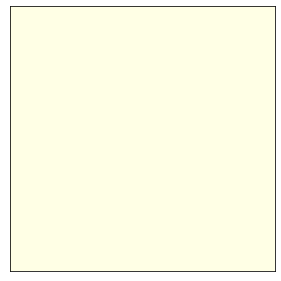

In [17]:
_,camera = part2(o2,True)
print("Saving animation... ",end="")
anim = camera.animate(blit=True)
anim.save('visualisation/day11animation.gif', writer='imagemagick')
print("Animation saved.")

![Flashes](./visualisation/day11animation.gif)